# Reccurrent Neural Network

## Part 1 - Data Preprocessing

In [12]:
# Importing the neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = 'white'

In [2]:
# Importing the training set
dataset_train_X = pd.read_csv("./New Data 13/X_preprocessed.csv", header=None)
dataset_train_y = pd.read_csv("./New Data 13/y_preprocessed.csv", header=None)
training_set_X = dataset_train_X.iloc[:, :].values
training_set_y = dataset_train_y.iloc[:, :].values

In [3]:
# Feature Scaling
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler(feature_range = (0, 1))
# training_set_X_scaled = sc.fit_transform(training_set_X)
training_set_X_scaled = training_set_X

In [4]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(50, len(training_set_X)+1):
    X_train.append(training_set_X_scaled[i-50:i, :])
    y_train.append(training_set_y[i-1, :])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
# reshape data into time steps of sub-sequences
n_steps, n_length, n_features = 2, 25, 118
X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))

In [6]:
n_outputs = 6

## Part 2 - Building the CNN-LSTM

In [7]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [8]:
# Initialising the RNN
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(units = 100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units = 100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

2022-12-04 13:56:37.404944: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-04 13:56:37.405062: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



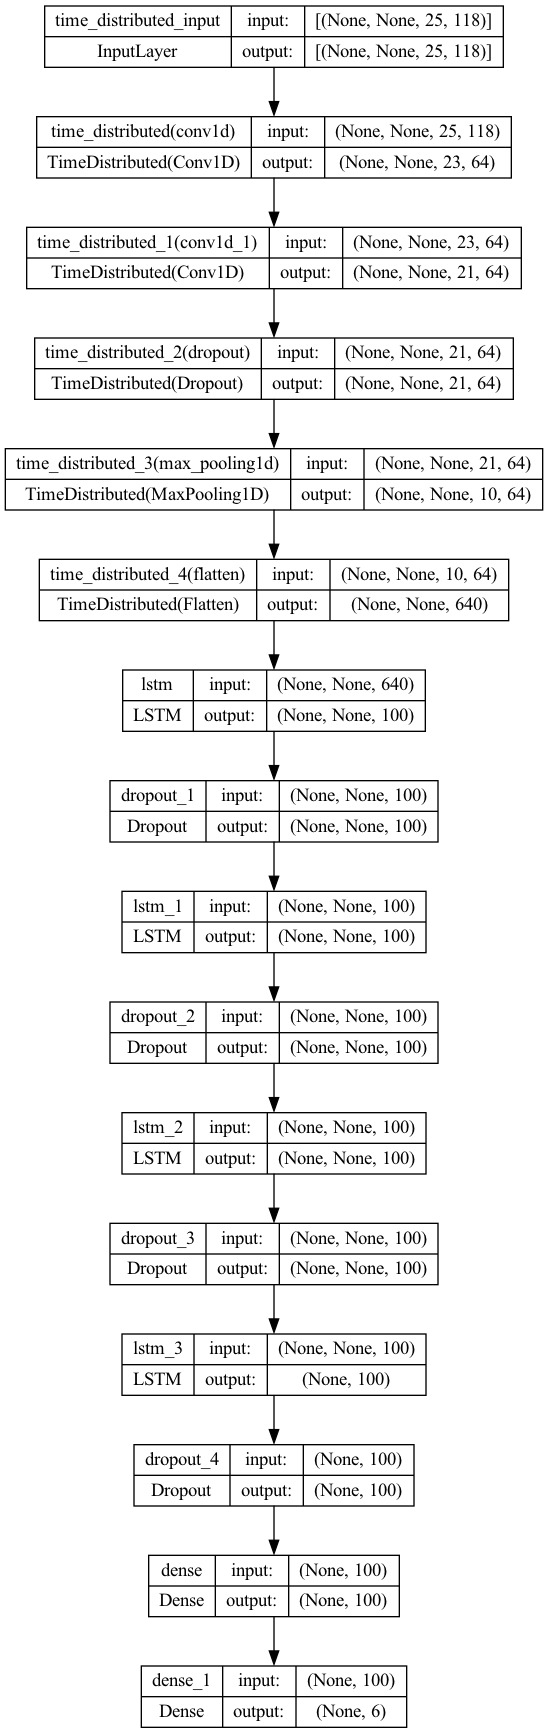

In [9]:
import tensorflow as tf
dot_img_file = './model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

In [10]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10


2022-12-04 13:56:46.005000: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-04 13:56:48.953045: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:56:49.400454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:56:49.484728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:56:49.539856: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:56:49.595523: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:56:49.802452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114

1465/1465 [==============================] - ETA: 0s - loss: 0.3148 - accuracy: 0.8852

2022-12-04 13:57:34.766502: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:57:34.925824: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:57:34.969587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:57:35.019604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-12-04 13:57:35.084083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1465/1465 [==============================] - 51s 32ms/step - loss: 0.3148 - accuracy: 0.8852 - val_loss: 0.6795 - val_accuracy: 0.7738
Epoch 2/10
1465/1465 [==============================] - 46s 31ms/step - loss: 0.0806 - accuracy: 0.9752 - val_loss: 1.1578 - val_accuracy: 0.7632
Epoch 3/10
1465/1465 [==============================] - 48s 32ms/step - loss: 0.0555 - accuracy: 0.9838 - val_loss: 0.7210 - val_accuracy: 0.7794
Epoch 4/10
1465/1465 [==============================] - 46s 32ms/step - loss: 0.0473 - accuracy: 0.9863 - val_loss: 1.5540 - val_accuracy: 0.6638
Epoch 5/10
1465/1465 [==============================] - 46s 31ms/step - loss: 0.0329 - accuracy: 0.9909 - val_loss: 3.0106 - val_accuracy: 0.4958
Epoch 6/10
1465/1465 [==============================] - 47s 32ms/step - loss: 0.0374 - accuracy: 0.9911 - val_loss: 1.0404 - val_accuracy: 0.7876
Epoch 7/10
1465/1465 [==============================] - 48s 33ms/step - loss: 0.0265 - accuracy: 0.9935 - val_loss: 0.9476 - val_accura

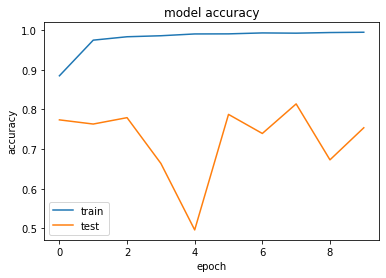

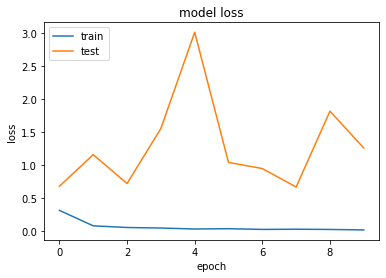

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
from keras.models import load_model

model.save('./New Data 13/my_model50_2.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# model = load_model('./New Data 11/my_model50_2.h5')

## Part 3 - Making the predictions and visualising the results

In [16]:
cls=['falling','pain/cough','sitting','sleeping','standing','walking']

In [17]:
import mediapipe as mp
import cv2
import math

objc[6059]: Class CaptureDelegate is implemented in both /opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_videoio.3.4.16.dylib (0x3823bc860) and /opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x42c7ba538). One of the two will be used. Which one is undefined.
objc[6059]: Class CVWindow is implemented in both /opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x31f578a68) and /opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x42c7ba588). One of the two will be used. Which one is undefined.
objc[6059]: Class CVView is implemented in both /opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/mediapipe/.dylibs/libopencv_highgui.3.4.16.dylib (0x31f578a90) and /opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/cv2/cv2.abi3.so (0x42c7ba5b0). One of the two will be used. Which one is undefin

In [18]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [19]:
def most_frequent(List):
    return max(set(List), key = List.count)

def distance(p1,p2):
    d = math.sqrt(math.pow(p1[0] - p2[0], 2) +math.pow(p1[1] - p2[1], 2) +math.pow(p1[2] - p2[2], 2)* 1.0)
    return d

In [20]:
def features(landmarks):
    feat=[]
    landmarks=list(landmarks)
    #1st:15-16
    rwrist=[landmarks[16].x,landmarks[16].y,landmarks[16].z]
    lwrist=[landmarks[15].x,landmarks[15].y,landmarks[15].z]
    feat.append(distance(rwrist,lwrist))
                
    #2nd: 15-11
    lshoulder= [landmarks[11].x,landmarks[11].y,landmarks[11].z]  
    feat.append(distance(rwrist,lshoulder))
                
    #3rd: 12-16
    rshoulder = [landmarks[12].x,landmarks[12].y,landmarks[12].z] 
    feat.append(distance(rshoulder,rwrist))
                
    #4th: 15-23
    lhip= [landmarks[23].x,landmarks[23].y,landmarks[23].z]
    feat.append(distance(lhip,lwrist))
                
    #5th: 16-24
    rhip= [landmarks[24].x,landmarks[24].y,landmarks[24].z] 
    feat.append(distance(rhip,lwrist))
                
    #6th: 23-24
    feat.append(distance(lhip,rhip))
    
    #7th: 16-28
    rankle=[landmarks[28].x,landmarks[28].y,landmarks[28].z]
    feat.append(distance(rankle,rwrist))
                
    #8th: 15-27
    lankle=[landmarks[27].x,landmarks[27].y,landmarks[27].z]
    feat.append(distance(lankle,lwrist))
    
    #9th: 23-27
    feat.append(distance(lhip,lankle))
                
    #10th: 24-28
    feat.append(distance(rhip,rankle))
                
    #11th: 28-27
    feat.append(distance(lankle,rankle))
                
    #12th: 5-30
    rheel=[landmarks[30].x,landmarks[30].y,landmarks[30].z]
    reye=[landmarks[5].x,landmarks[5].y,landmarks[5].z]
    feat.append(distance(reye,rheel))
                
    #13th: 2-29
    leye=[landmarks[2].x,landmarks[2].y,landmarks[2].z]
    lheel=[landmarks[29].x,landmarks[29].y,landmarks[29].z]
    feat.append(distance(leye,lheel))
    
    #14th: 14-27
    relbow=[landmarks[14].x,landmarks[14].y,landmarks[14].z]
    feat.append(distance(relbow,lankle))
                
    #15th: 13-28
    lelbow=[landmarks[13].x,landmarks[13].y,landmarks[13].z]
    feat.append(distance(lelbow,rankle))
    
    #16th: 0-15
    nose=[landmarks[0].x,landmarks[0].y,landmarks[0].z]
    feat.append(distance(nose,lwrist))
    
    #17th: 0-16
    feat.append(distance(nose,rwrist))

    lknee=[landmarks[26].x,landmarks[26].y,landmarks[26].z]
    rknee=[landmarks[25].x,landmarks[25].y,landmarks[25].z]
    feat.append(distance(lknee,rknee))
    
    #19th: 31-32
    ltoe=[landmarks[31].x,landmarks[31].y,landmarks[31].z]
    rtoe=[landmarks[32].x,landmarks[32].y,landmarks[32].z]
    feat.append(distance(ltoe,rtoe))
    
    return feat

In [24]:
cv2.startWindowThread()

cap=cv2.VideoCapture("/Users/parth/Documents/Rutgers Coursework/Semester 3/Biomed/New Data 13/Prashant_demo.mov")
#Cap=cv2.VideoCapture(r"C:\Users\Aditya\Documents\Aditya\Topics_in_bio_med\stuff\standing.mp4")
#cap=cv2.VideoCapture(r"C:\Users\Aditya\Videos\Captures\biomed - morgue - PC, Mac & Linux Standalone - Unity 2020.3.25f1_ DX11 2022-10-23 21-28-05.mp4")
buffer=[]
# result = cv2.VideoWriter('filename.mp4', 
                        #  cv2.VideoWriter_fourcc(*'XVID'),15, (1280,646))

out=""
framecount=0
with mp_pose.Pose(min_detection_confidence=0.1, min_tracking_confidence=0.5) as pose:
    while(True):
        framecount+=1
        ret,frame=cap.read()
        keypoints=[]
        if(not ret):
            break
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
     #   image=cv2.rotate(image,cv2.ROTATE_180)
        image.flags.writeable = False
        results = pose.process(image)
        try:
            landmarks=results.pose_landmarks.landmark
            for points in range(len(landmarks)):
                keypoints.extend([landmarks[points].x, landmarks[points].y, landmarks[points].z])
            # buffer.extend(keypoints)
            keypoints.extend(features(landmarks))
            buffer.append(keypoints)
            if(len(np.array(buffer))>=50):# and framecount%3==0):
                buffer_array = np.array(buffer).reshape((50, n_features))
                # buffer_array_scaled = sc.transform(buffer_array)
                buffer_array_scaled = buffer_array
                buffer_array_scaled = buffer_array_scaled.reshape((1, n_steps, n_length, n_features))
                predicted_activity = model.predict(buffer_array_scaled)
                results_new = np.argmax(predicted_activity, axis = 1)
                out=cls[results_new[0]]
                buffer.pop(0)
                # for val,actions in enumerate(mean_val):
                #     image = cv2.putText(image, cls[val]+": "+str(round(100*actions,2)), (50,val*70+100) , cv2.FONT_HERSHEY_SIMPLEX, 
                #        1, (255,0,0), 2, cv2.LINE_AA)
            # if(len(np.array(buffer))>=15):
            #     for val,actions in enumerate(mean_val):
                image = cv2.putText(image, out, (50,50) , cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2, cv2.LINE_AA)
            image.flags.writeable = True
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            image = cv2.putText(image, out, (1100,150) , cv2.FONT_HERSHEY_SIMPLEX, 
                       1, (0,255,5), 2, cv2.LINE_AA)
            mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                    mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                    mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                     )               
            # result.write(image)
            cv2.imshow('Mediapipes', image)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                        break
        except:
           print("Exception")
           continue
    
    cap.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)
    cv2.waitKey(1)
    cv2.waitKey(1)
    cv2.waitKey(1)

1/1 [==============================] - 0s 16ms/step
Exception
1/1 [==============================] - 0s 16ms/step
